In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
ROOT_PATH = '/Users/sarim.zafar@ibm.com/Projects/ML/Datasets/'

train_data_directory = os.path.join(ROOT_PATH, "BelgiumTSC/Training")
test_data_directory = os.path.join(ROOT_PATH, "BelgiumTSC/Testing")

images, labels = load_data(train_data_directory)

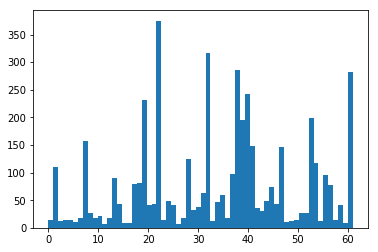

In [4]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

In [5]:
import matplotlib.pyplot as plt

def display_images(arr):
    for i in range(len(arr)):
        plt.subplot(1, 4, i+1)
        plt.axis('off')
        plt.imshow(images[arr[i]])
        plt.subplots_adjust(wspace=0.5)
        
        plt.show()
        print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))


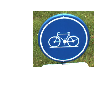

shape: (236, 256, 3), min: 0, max: 255


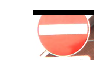

shape: (133, 164, 3), min: 0, max: 255


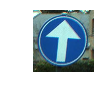

shape: (122, 121, 3), min: 0, max: 255


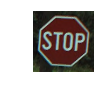

shape: (123, 123, 3), min: 0, max: 215


In [6]:
traffic_signs = [300, 2250, 3650, 4000]
display_images(traffic_signs)

In [7]:
from skimage import transform, color

rescaleWidth = 28
rescaleHeight = 28

def modifyDataset(dataset):
    result = np.empty((len(dataset), rescaleWidth, rescaleHeight));
    
    for i in range(len(dataset)):
        image = dataset[i]
        grayscale = color.rgb2gray(image)
        rescaled = transform.resize(grayscale, (rescaleWidth, rescaleHeight))
        
        result[i] = rescaled/255.0 # Normalize to be between 0 and 1
    
    return result

images28 = modifyDataset(images)

In [62]:
from tensorflow import keras
# Define model here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(rescaleWidth, rescaleHeight)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(len(np.unique(labels)), activation=tf.nn.softmax)
])

In [63]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


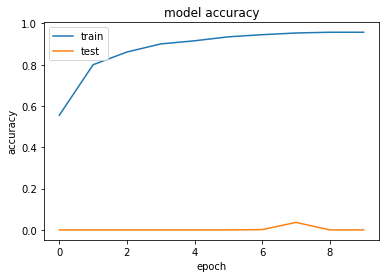

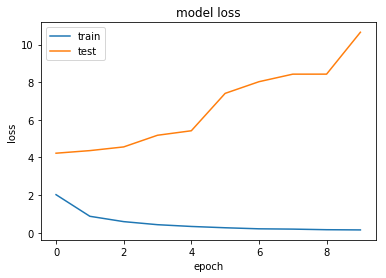

In [64]:
history = model.fit(images28, labels, epochs=10, validation_split=0.15, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# For Testing dataset
testImages, testLabels = load_data(test_data_directory)
# Modify dataset 
testImages28 = modifyDataset(testImages)

In [66]:
test_loss, test_acc = model.evaluate(testImages28, testLabels)

print('Test Accuracy:', test_acc)
# print('Test Loss', test_loss)

2520/2520 [==============================] - 0s 29us/step
Test Accuracy: 0.5527777777777778
